In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

MOCK = 1
execfile ("_ImportScript.py")

1


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:553: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:390: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)


Generated  32  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.6204311
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:355: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)


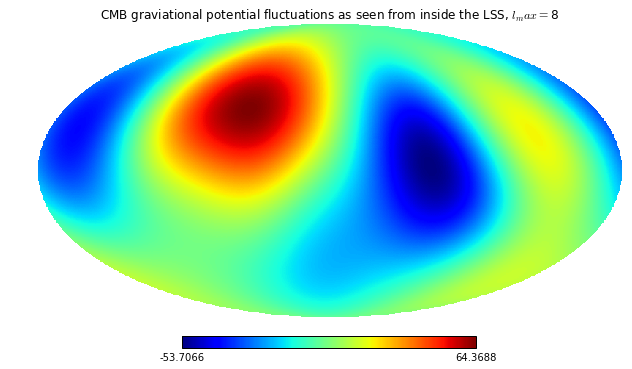

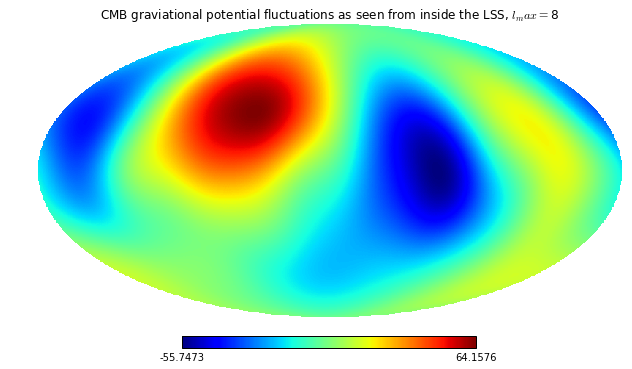

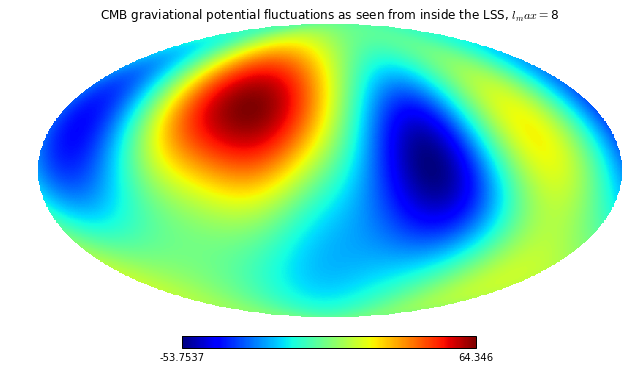

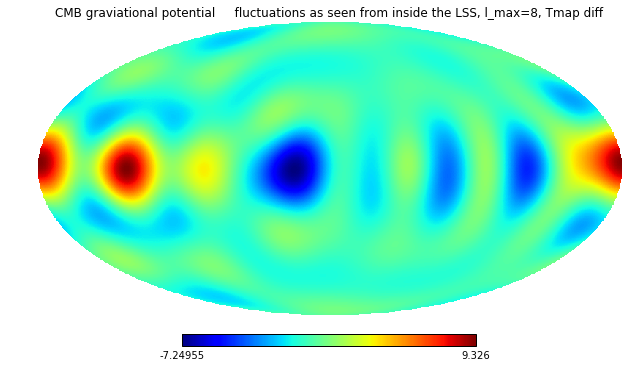

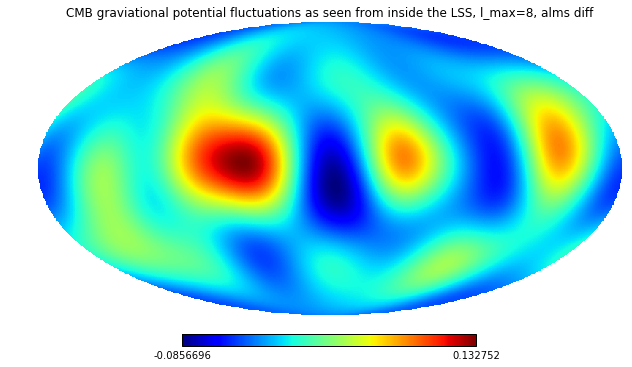

In [2]:
execfile ("_ReconstructionScript.py")


In [8]:
# From those f_n's build the 3d spatial potential:
ind = np.where(We.kfilter>0)
NN = 2*len(ind[1])
k_x, k_y, k_z = We.kx[ind], We.ky[ind], We.kz[ind]


RealPhi = np.zeros(We.x.shape,dtype=np.complex128)
for i in range(len(ind[1])):
    phase = k_x[i] * We.x + k_y[i] * We.y + k_z[i] * We.z
    RealPhi += (We.fn[i] * np.cos(phase)+We.fn[len(ind[1])+i]*np.sin(phase))*We.Deltak_for_iFFT**3
    We.phi = RealPhi.real
    
Weres2 = beatbox.Universe()
Weres2.fn = beatbox.You.all_simulated_universes[-1].fn.reshape(len(We.fn),1)-We.fn
#ind = np.where(Weres2.kfilter>0)
#NN = 2*len(ind[1])
k_x, k_y, k_z = Weres2.kx[ind], Weres2.ky[ind], Weres2.kz[ind]
RealPhi2 = np.zeros(We.x.shape,dtype=np.complex128)
for i in range(len(ind[1])):
    phase2 = k_x[-i] * Weres2.x + k_y[-i] * Weres2.y + k_z[-i] * Weres2.z
    RealPhi2 += (Weres2.fn[-i] * np.cos(phase2)+Weres2.fn[len(ind[1])-i]*np.sin(phase2))*Weres2.Deltak_for_iFFT**3
    Weres2.phi = RealPhi2.real
Weres2.Pdist=1
Weres2.Pmax=2*np.pi

In [3]:
We.rearrange_fn_from_vector_to_grid()
We.evaluate_potential_given_fourier_coefficients()

Built potential grid, with dimensions  (41, 41, 41)  and mean value  0.0 +/- 0.6040781


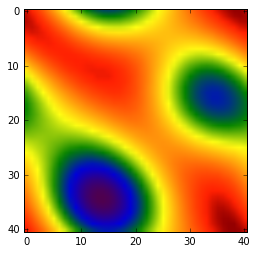

In [8]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(beatbox.You.all_simulated_universes[-1].phi[:,:,20])


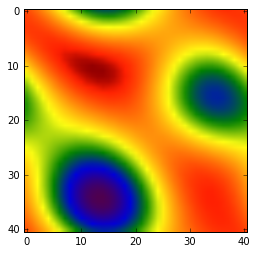

In [55]:
plt.imshow(We.phi[:,:,20])


In [ ]:
beatbox.You.all_simulated_universes[-1].Tmap=None
beatbox.You.all_simulated_universes[-1].alm=None
beatbox.You.all_simulated_universes[-1].transform_3D_potential_into_alm()
beatbox.You.all_simulated_universes[-1].show_CMB_T_map()
We.show_CMB_T_map()

In [ ]:
import glob
from PIL import Image as PIL_Image
from images2gif import writeGif
images = [PIL_Image.open(framefile) for framefile in glob.glob('../frames/*.png')]


writeGif('l.gif', images, duration=0.2)

In [ ]:
import yt

yt : [INFO     ] 2016-04-06 15:34:25,603 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-04-06 15:34:25,603 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-04-06 15:34:25,605 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-04-06 15:34:25,606 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-04-06 15:34:25,607 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-04-06 15:34:25,642 Loading field plugins.
yt : [INFO     ] 2016-04-06 15:34:25,643 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-04-06 15:34:25,644 Loaded astro (15 new fields)
yt : [INFO     ] 2016-04-06 15:34:25,646 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-04-06 15:34:25,647 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-04-06 15:34:25,649 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-04-06 15:34:25,651 Loaded geometric (112 ne

1
-2.07889507667 1.4266009367


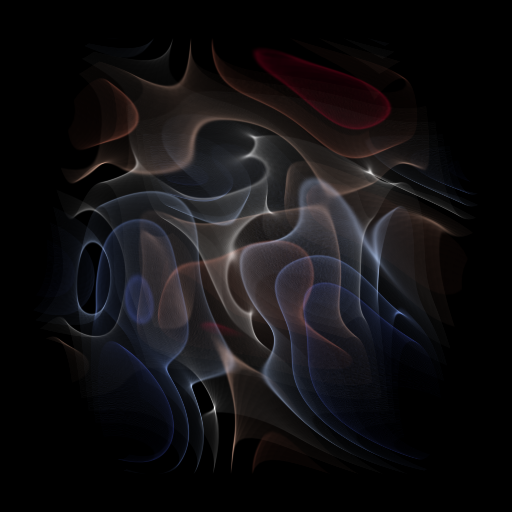

yt : [INFO     ] 2016-04-06 15:34:31,528 xlim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:34:31,529 ylim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:34:31,532 xlim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:34:31,533 ylim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:34:31,535 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



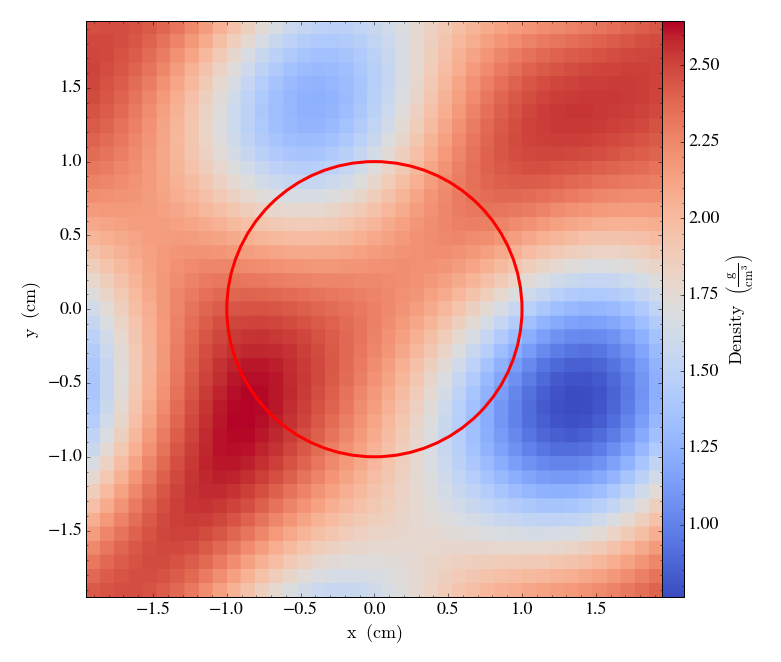

yt : [INFO     ] 2016-04-06 15:34:32,213 Saving plot phi_Slice_z_density.png


In [52]:
We.Pdist=1
We.Pmax=2*np.pi
We.show_potential_with_yt(angle=np.pi/8,  N_layer=7, cmap='coolwarm', show3D=1, Slice=1)

yt : [INFO     ] 2016-04-06 15:34:44,989 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-04-06 15:34:44,989 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-04-06 15:34:44,990 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-04-06 15:34:44,991 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-04-06 15:34:44,992 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-04-06 15:34:45,017 Loading field plugins.
yt : [INFO     ] 2016-04-06 15:34:45,018 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-04-06 15:34:45,018 Loaded astro (15 new fields)
yt : [INFO     ] 2016-04-06 15:34:45,019 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-04-06 15:34:45,020 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-04-06 15:34:45,022 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-04-06 15:34:45,022 Loaded geometric (112 ne

-1.93310454434 1.67674105547


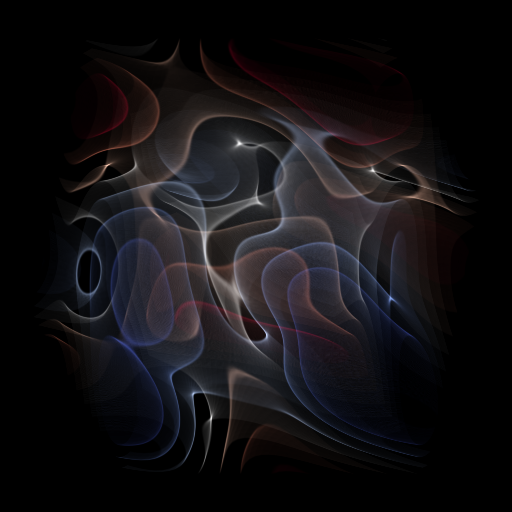

yt : [INFO     ] 2016-04-06 15:34:50,886 xlim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:34:50,887 ylim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:34:50,890 xlim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:34:50,890 ylim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:34:50,892 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



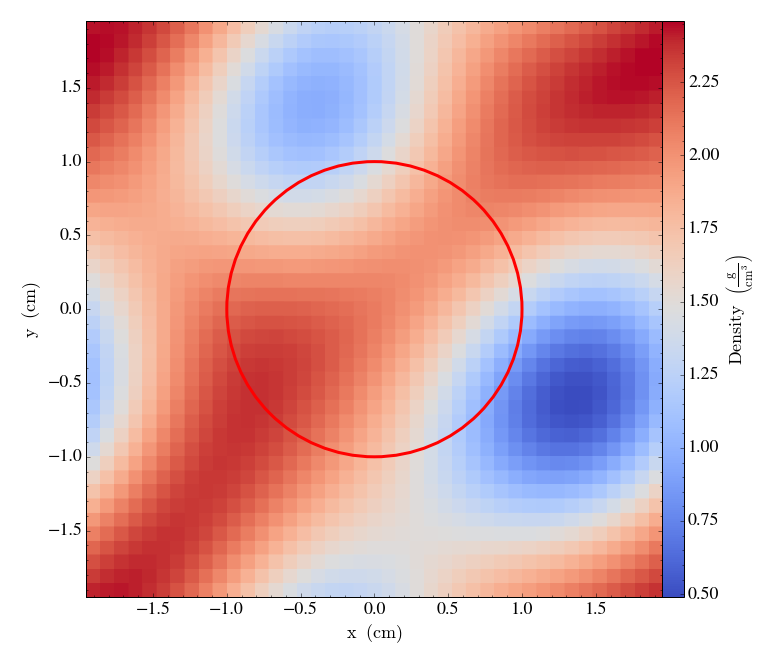

yt : [INFO     ] 2016-04-06 15:34:51,679 Saving plot phi_Slice_z_density.png


In [53]:
#A.evaluate_potential_given_fourier_coefficients(printout=0)
beatbox.You.all_simulated_universes[-1].show_potential_with_yt(angle=np.pi/8,  N_layer=7, cmap='coolwarm', show3D=1, Slice=1)

yt : [INFO     ] 2016-04-06 15:40:08,929 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-04-06 15:40:08,930 Parameters: domain_dimensions         = [41 41 41]
yt : [INFO     ] 2016-04-06 15:40:08,931 Parameters: domain_left_edge          = [-1.95121951 -1.95121951 -1.95121951]
yt : [INFO     ] 2016-04-06 15:40:08,933 Parameters: domain_right_edge         = [ 1.95121951  1.95121951  1.95121951]
yt : [INFO     ] 2016-04-06 15:40:08,934 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-04-06 15:40:08,962 Loading field plugins.
yt : [INFO     ] 2016-04-06 15:40:08,964 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2016-04-06 15:40:08,965 Loaded astro (15 new fields)
yt : [INFO     ] 2016-04-06 15:40:08,966 Loaded cosmology (22 new fields)
yt : [INFO     ] 2016-04-06 15:40:08,969 Loaded fluid (64 new fields)
yt : [INFO     ] 2016-04-06 15:40:08,970 Loaded fluid_vector (96 new fields)
yt : [INFO     ] 2016-04-06 15:40:08,972 Loaded geometric (112 ne

-0.151926946324 0.52642414682


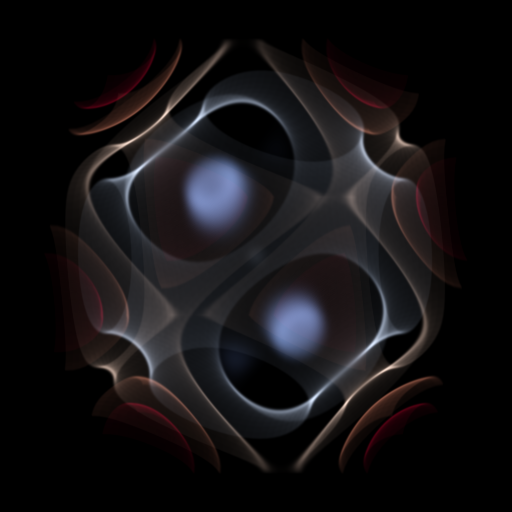

yt : [INFO     ] 2016-04-06 15:40:14,742 xlim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:40:14,743 ylim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:40:14,746 xlim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:40:14,747 ylim = -1.951220 1.951220
yt : [INFO     ] 2016-04-06 15:40:14,749 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



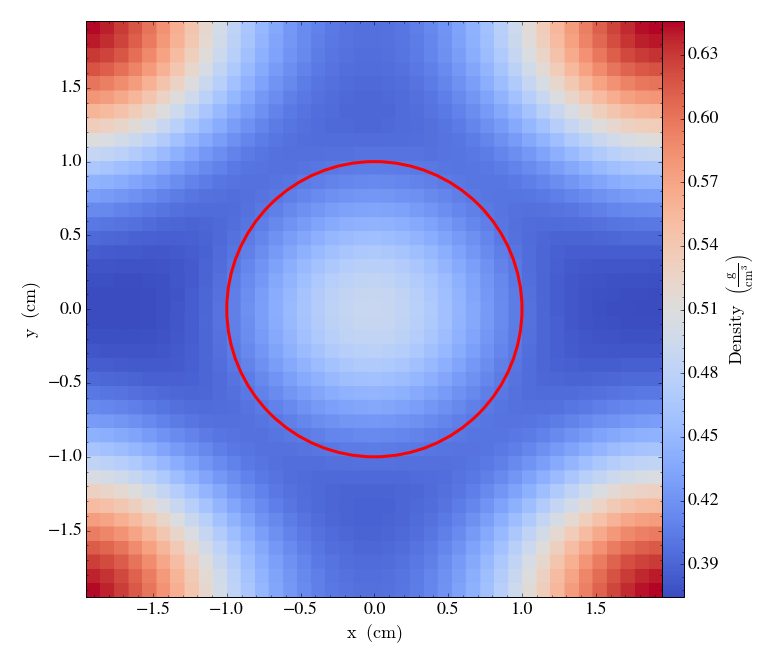

yt : [INFO     ] 2016-04-06 15:40:15,651 Saving plot phi_Slice_z_density.png


In [54]:
Weres2 = beatbox.Universe()
Weres2.phi = beatbox.You.all_simulated_universes[-1].phi-We.phi

Weres2.Pdist=1
Weres2.Pmax=2*np.pi
Weres2.show_potential_with_yt(angle=np.pi/8,  N_layer=6, cmap='coolwarm', show3D=1, Slice=1)

/Users/LaurencePeanuts/miniconda2/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


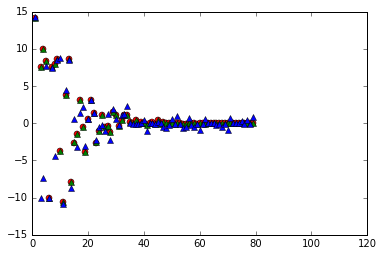

In [56]:

import matplotlib.pyplot as plt
plt.plot(np.arange(len(beatbox.You.all_simulated_universes[-1].ay)) , beatbox.You.all_simulated_universes[-1].ay , 'ro', np.arange(len(We.ay)),We.ay , 'g^', np.arange(len(MockUniverse.ay)),MockUniverse.ay , 'b^')
plt.axis([0 , 120, -15,15])
plt.show()


In [ ]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map(from_perspective_of="observer")

In [ ]:
numreal=1000
#beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, [beatbox.Universe() for i in range(numreal)])
beatbox.You.all_reconstructed_universes = np.append(beatbox.You.all_reconstructed_universes, [beatbox.Universe() for i in range(numreal)])

for i in range(numreal):
    # First, generate one realization of noise
    noise = beatbox.You.generate_one_realization_of_noise()
    # Add the noise to the initial realization of the sky map
    datamap = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)+noise
    datamap = datamap.T
    
    # Reconstruct the fn's
    beatbox.You.solve_for_3D_potential(datamap)
    beatbox.You.all_reconstructed_universes[i].fn=beatbox.You.reconstrunct_fn
    beatbox.You.all_reconstructed_universes[i].transform_3D_potential_into_alm(usedefault=1, fn=1)
    #beatbox.You.all_reconstructed_universes[i].show_CMB_T_map(from_perspective_of="observer")
    



In [ ]:
n = 30
smarts=np.zeros(numreal)
for i in range(numreal):
    smarts[i] = beatbox.You.all_reconstructed_universes[i].fn[n] 
print smarts[:].shape

In [ ]:
nbins, bins, patches = plt.hist(smarts, 100, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(beatbox.You.all_simulated_universes[0].fn[n])

#plt.axvline(We.fn[5])

plt.show()

In [ ]:
beatbox.You.all_reconstructed_universes[i].ay[1][0]

In [ ]:
ay74=np.zeros(numreal)
for i in range(numreal):
    ay74[i] = beatbox.You.all_reconstructed_universes[i].ay[74][0]


n, bins, patches = plt.hist(ay74, 40, normed=1, facecolor='yellow', alpha=0.75)

plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(beatbox.You.all_simulated_universes[0].ay[74])

#plt.axvline(We.ay[5])

plt.show()



In [ ]:
beatbox.You.generate_realizations_from_posterior(We.fn, number_of_realizations=1000)


In [ ]:
for k in range(10):
    beatbox.You.all_simulated_universes[-1-k].show_CMB_T_map(from_perspective_of="observer")

In [ ]:
#for k in range(10):
#    beatbox.You.all_simulated_universes[-1-k].show_CMB_T_map(from_perspective_of="observer")
post106=np.zeros(1000)
for i in range(1000):
    post106[i] = beatbox.You.all_simulated_universes[-1-i].fn[106] 

In [ ]:
n, bins, patches = plt.hist(post106, 20, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(beatbox.You.all_simulated_universes[0].fn[106])

#plt.axvline(We.fn[5])

plt.show()

In [ ]:
beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
beatbox.You.all_data_universes[-1].read_in_CMB_T_map(from_this='data/commander_32band_Clsamples100/cmb_Cl_c0001_k00030.fits')
beatbox.You.all_data_universes[-1].decompose_T_map_into_spherical_harmonics()
beatbox.You.all_data_universes[-1].alm2ay()
beatbox.You.all_data_universes[-1].ay2alm(beatbox.You.all_data_universes[-1].ay)
beatbox.You.all_data_universes[-1].show_CMB_T_map(from_perspective_of="observer")

In [ ]:
beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
beatbox.You.all_data_universes[-1].read_in_CMB_T_map(from_this='data/commander_32band_Clsamples100/cmb_Cl_c0002_k00030.fits')
beatbox.You.all_data_universes[-1].decompose_T_map_into_spherical_harmonics()
beatbox.You.all_data_universes[-1].alm2ay()
beatbox.You.all_data_universes[-1].ay2alm(beatbox.You.all_data_universes[-1].ay)
beatbox.You.all_data_universes[-1].show_CMB_T_map(from_perspective_of="observer")

In [ ]:
beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
beatbox.You.all_data_universes[-1].read_in_CMB_T_map(from_this='data/commander_32band_Clsamples100/cmb_Cl_c0001_k00031.fits')
beatbox.You.all_data_universes[-1].decompose_T_map_into_spherical_harmonics()
beatbox.You.all_data_universes[-1].alm2ay()
beatbox.You.all_data_universes[-1].ay2alm(beatbox.You.all_data_universes[-1].ay)
beatbox.You.all_data_universes[-1].show_CMB_T_map(from_perspective_of="observer")


In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(datamap)) , datamap , 'ro', np.arange(len(noise[0])),noise[0], 'g^', np.arange(len(MockUniverse.ay)),(MockUniverse.ay) , 'b^', np.arange(len(ay)),ay , 'k^')
plt.axis([0 , 70, -10,10])
plt.show()

In [ ]:
 #Select the m values out the the lms tupples
m = np.array([m[1] for m in beatbox.Universe.lms])
        #Find the indices of the positive ms
pos_ind = (m>0)
        #Find the indices of the m=0
zero_ind = (m==0)
        #Find the indices of the negative ms
neg_ind = (m<0)
        
ay = np.zeros(len(beatbox.Universe.lms), dtype=np.complex128)
        
ay[pos_ind] = datamap[pos_ind].real+1j*datamap[neg_ind]
ay[neg_ind] = ((datamap[pos_ind].T-1j*datamap[neg_ind].T) * (-1)**m[neg_ind]).T
ay[zero_ind] = datamap[zero_ind]
        

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys

MOCK = 1
execfile ("_ImportScript.py")

In [ ]:
execfile ("scratch/Tests.py")

In [ ]:
We.phi[21,20+6,20-3]

In [ ]:
np.meshgrid(np.linspace(-3,2,3),np.linspace(-3,2,3), indexing='ij')

In [ ]:
Deltafft_analytics = beatbox.Universe()
Deltafft_analytics.phi=We.phi-We2.phi
Deltafft_analytics.Pdist = 1
Deltafft_analytics.Pmax = 2*np.pi
Deltafft_analytics.show_potential_with_yt(angle=np.pi/8,  N_layer=6, cmap='BrBG', show3D=0, Slice=1)


In [ ]:
Deltaman_analytics = beatbox.Universe()
Deltaman_analytics.phi=We3.phi-We2.phi
Deltaman_analytics.Pdist = 1
Deltaman_analytics.Pmax = 2*np.pi
Deltaman_analytics.show_potential_with_yt(angle=np.pi/8,  N_layer=6, cmap='BrBG', show3D=0, Slice=1)

In [ ]:
Deltaman_fft = beatbox.Universe()
Deltaman_fft.phi=We3.phi-We.phi
Deltaman_fft.Pdist = 1
Deltaman_fft.Pmax = 2*np.pi
Deltaman_fft.show_potential_with_yt(angle=np.pi/8,  N_layer=6, cmap='BrBG', show3D=0, Slice=1)

In [ ]:
We.phi[20,20,20]/(We2.phi[20,20,20])

In [ ]:
We3.phi[21,21,21]

In [ ]:
We.evaluate_potential_given_fourier_coefficients()
#We.phi=We.phi/np.sqrt((np.pi)*4)
#We.show_potential_with_yt(angle=np.pi/8,  N_layer=6, cmap='BrBG', show3D=0, Slice=1)

In [ ]:
#np.savetxt("toifftforYashar.txt", We.fngrid, fmt='%1.4e')

with file("toifftforYashar.txt", 'w') as outfile:
    # I'm writing a header here just for the sake of readability
    # Any line starting with "#" will be ignored by numpy.loadtxt
    outfile.write('# Array shape: {0}\n'.format( We.fngrid.shape))

    # Iterating through a ndimensional array produces slices along
    # the last axis. This is equivalent to data[i,:,:] in this case
    for data_slice in  We.fngrid:

        # The formatting string indicates that I'm writing out
        # the values in left-justified columns 7 characters in width
        # with 2 decimal places.  
        np.savetxt(outfile, data_slice)

        # Writing out a break to indicate different slices...
        outfile.write('# New slice\n')

In [ ]:
len(We.fngrid[np.where(We.fngrid>0)])

In [ ]:
np.where(We.fngrid>0)

In [ ]:
41*41*41

In [ ]:
We.Deltak**3

In [ ]:
We3.phi[20,20,20]

In [ ]:
1/1.5

In [ ]:
(beatbox.Universe.kx.shape[0])**3

In [ ]:
We4 = beatbox.Universe()
We4.fngrid = np.zeros(We.x.shape,dtype=np.float_)
We4.fngrid[20,20,20] = 1.5
We4.evaluate_potential_given_fourier_coefficients()
#We.phi=We.phi/np.pi
import yt
We4.Pdist = 1
We4.Pmax = 2*np.pi
We4.show_potential_with_yt(angle=np.pi/8,  N_layer=6, cmap='BrBG', show3D=0, Slice=1)


In [ ]:
We.phi[21,:,21]

In [ ]:
(We.phi[:,20,20]-We2.phi[:,20,20])/We.phi[:,20,20]*100

In [ ]:
(We.phi[:,20,20]-We2.phi[:,20,20])/We.phi[:,20,20]*100

In [ ]:
ComplexPhi = np.zeros(We.x.shape,dtype=np.complex128)
for i in range((2*We.nmax+1)**3):
    phase = We.kx.reshape((2*We.nmax+1)**3,1)[i] * We.x + We.ky.reshape((2*We.nmax+1)**3,1)[i] * We.y + We.kz.reshape((2*We.nmax+1)**3,1)[i] * We.z
    ComplexPhi += We.fngrid.reshape((2*We.nmax+1)**3,1)[i] * (np.cos(phase)+np.sin(phase)*1j)
We.phi2 = ComplexPhi.real*(We.kx_for_iFFT.shape[0])**3

In [ ]:
We.phi[20,:,20]

In [ ]:
We2.phi[20,:,20]

In [ ]:
(We2.phi[20,:,20]-We3.phi[20,:,20])/We2.phi[20,:,20]*100

In [ ]:
print np.linspace(-5,5,41)

In [ ]:
(2.*np.pi)**(-3./2.)/(1*a*1)*np.exp( -0.5* ( 0.**2. + (np.linspace(-5.+10./(2*41),5.-10./(2*41),41)/a)**2. + 0**2. ) )

In [ ]:
5.59794587730624e-07
      1.41408480941713e-06
      4.15295453864179e-06
      1.17378343814009e-05
      3.13181218462521e-05
      7.87478895712744e-05
      0.000186574740459813
      0.000416516130614304
      0.000876143750724788
       0.00173653455782057
       0.00324306766248977
       0.00570680595075384
       0.00946225651615613
        0.0147829410644215
        0.0217616334031009
        0.0301846851749338
        0.0394499382205541
        0.0485814553262945
        0.0563714531105271
        0.0616328790826798
        0.0634936359342411
        0.0616328790826798
        0.0563714531105271
        0.0485814553262945
        0.0394499382205541
        0.0301846851749338
        0.0217616334031009
        0.0147829410644215
       0.00946225651615613
       0.00570680595075384
       0.00324306766248977
       0.00173653455782057
      0.000876143750724788
      0.000416516130614304
      0.000186574740459813
      7.87478895712744e-05
      3.13181218462521e-05
      1.17378343814009e-05
      4.15295453864179e-06
      1.41408480941713e-06
      5.59794587730624e-07

In [ ]:
0.5/(-1.90243902+1.80731707)

In [ ]:
(1/(2*We.PIXSCALE))

In [ ]:
0.5/(0.1)

In [ ]:
print We.Deltak_for_iFFT
print We.kmax_for_iFFt

In [ ]:
0.18 *1.33